In [1]:
%matplotlib inline
import skimage.io as io
from pycocoevalcap.eval import COCOEvalCap
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from itertools import islice

In [2]:
# set up file names and pathes
valset = 'annotations/captions_val2017.json'
outputs = 'results/captions_val2017_results.json'

In [3]:
# create coco object and cocoOutput object
cocoObject = COCO(valset)

# Turn off interactive mode
plt.ioff()

plt.xlabel('n-gram')

cocoOutput = cocoObject.loadRes(outputs)

plt.ylabel('Bleu score')

# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(cocoObject, cocoOutput)

loading annotations into memory...
0:00:00.534482
creating index...
index created!
Loading and preparing results...     
DONE (t=0.06s)
creating index...
index created!


In [4]:
plt.title('Bleu Scores for Different n-grams')

cocoEval.params['image_id'] = cocoOutput.getImgIds()

# Set the style
plt.style.use('ggplot')

# evaluate results
cocoEval.evaluate()

tokenization...


PTBTokenizer tokenized 235726 tokens at 126394.96 tokens per second.
PTBTokenizer tokenized 41092 tokens at 77942.36 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 34451, 'reflen': 35123, 'guess': [34451, 30614, 26777, 22940], 'correct': [20929, 8645, 3236, 1275]}
ratio:0.980867
Bleu_1: 0.596
Bleu_2: 0.406
Bleu_3: 0.269
Bleu_4: 0.181


In [5]:
# Create a dictionary to store the evaluation scores
evaluation_scores = {}

# Populate the dictionary with the evaluation scores
for stype, sval in cocoEval.eval.items():
    evaluation_scores[stype] = sval

# Access the evaluation scores as needed
for i in range(4):
    metric = 'Bleu_%d'%(i+1)
    print('%s: %.3f'%(metric, evaluation_scores[metric]))

Bleu_1: 0.596
Bleu_2: 0.406
Bleu_3: 0.269
Bleu_4: 0.181


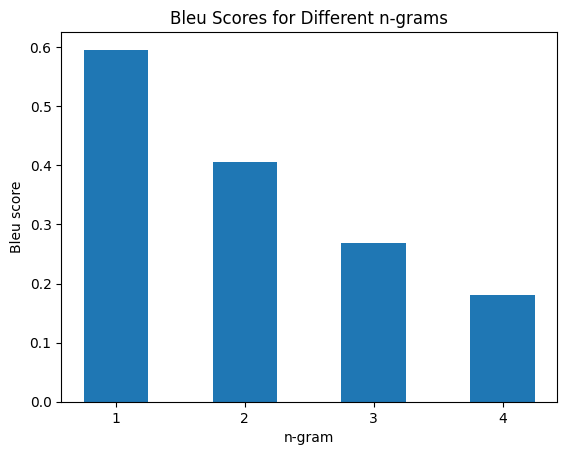

In [6]:
# Data for the Bleu scores
ngrams = [1, 2, 3, 4]
bleu_scores = list(islice(evaluation_scores.values(), 4))

# Create the bar graph
plt.bar(ngrams, bleu_scores, width=0.5)

# Adjust x-axis spacing
plt.xticks(ngrams)

# Display the graph
plt.show()